In [1]:
import pickle
import sys

sys.path.append('./../../')

import numpy as np
import matplotlib.pyplot as plt

from analyze_utils.color import cold_qualitative, qualitative

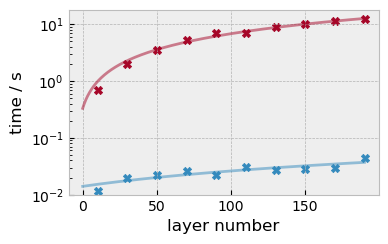

In [2]:
with open('./result', 'rb') as f:
    res = pickle.load(f) # jacobian 

cpu = res['jacobi']['cpu']
gpu = res['jacobi']['gpu']

layers = cpu['layer_number']
cpu_time = cpu['time']
gpu_time = gpu['time']

k_cpu, b_cpu = np.polyfit(layers, cpu_time, 1)
k_gpu, b_gpu = np.polyfit(layers, gpu_time, 1)
N_e = np.linspace(0, layers[-1], 1000)


with plt.style.context('bmh'):
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(4, 2.4)

    ax.scatter(layers, cpu_time, label='CPU time', marker='X', color='C1')
    ax.scatter(layers, gpu_time, label='GPU time', marker='X', color='C0')

    ax.plot(N_e, k_cpu * N_e + b_cpu, color='C1', alpha=0.5)
    ax.plot(N_e, k_gpu * N_e + b_gpu, color='C0', alpha=0.5)

    ax.set_yscale('log')
    ax.set_ylim(1e-2, )
    ax.set_ylabel('time / s')
    ax.set_xlabel('layer number')

    fig.savefig('./cpu_vs_gpu', dpi=300, bbox_inches='tight')

    plt.show()

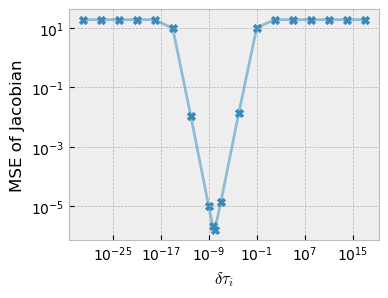

In [5]:
with open('./result_dif_h', 'rb') as f:
    res = pickle.load(f) # jacobian 

hs = res['hs']
errors = res['errors']

with plt.style.context('bmh'):
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(4, 3)

    ax.scatter(hs, errors, color='C0', marker='X')
    ax.plot(hs, errors, color='C0', alpha=0.5)

    ax.set_yscale('log')
    ax.set_ylim()
    ax.set_xscale('log')
    ax.set_xlim()

    ax.set_xlabel('$\delta \\tau_i$')
    ax.set_ylabel('MSE of Jacobian')

    fig.savefig('./dif_grad_finetune_h.png', dpi=300, bbox_inches='tight')

    plt.show()